Notebook: Classic Deep Learning — MLP (Fashion-MNIST)

# Classic Deep Learning — MLP (Fashion-MNIST)

This notebook demonstrates **inference and evaluation only**  
for a trained MLP model on the Fashion-MNIST dataset.

> ⚠️ Note  
> Model training, validation, and early stopping were executed via Python scripts  
> (`src/stage5_train.py` and related stages).  
> This notebook is for **demonstration, inspection, and sanity checks only**.


## Project Summary

- **Task:** 10-class image classification
- **Dataset:** Fashion-MNIST
- **Model:** MLP (Multi-Layer Perceptron)
- **Input:** 28×28 grayscale images (flattened)
- **Device:** CPU
- **Best Validation Accuracy:** ~0.896
- **Test Accuracy:** ~0.893


In [14]:
import sys
from pathlib import Path

# Add project src/ to PYTHONPATH
project_root = Path.cwd().parent
src_path = project_root / "src"
sys.path.append(str(src_path))

print("Added to PYTHONPATH:", src_path)



Added to PYTHONPATH: c:\Users\ORENS\module2-deep-learning-nlp\01_classic_dl_mlp\src


In [15]:
# Imports 
import torch
import matplotlib.pyplot as plt

# Device configuration 
from stage1_data_load import get_dataloaders, CLASSES
from stage4_model_baseline import MLP


## Load Trained Model Checkpoint

We load the **best model** saved during training  
(`outputs/models/best_model.pt`) and switch it to evaluation mode.


In [16]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load checkpoint and model
ckpt = torch.load("../outputs/models/best_model.pt", map_location=device)
config = ckpt["config"]

# Initialize model
model = MLP(
    hidden1=config["hidden1"],
    hidden2=config["hidden2"],
    dropout=config["dropout"],
    use_bn=config["use_bn"]
).to(device)

# Load model state
model.load_state_dict(ckpt["model_state"])
model.eval()

print("Model loaded successfully")


Using device: cpu
Model loaded successfully


## Load Data (Test Set)

We reuse the same dataloader logic as in the training pipeline  
to ensure full consistency.


In [17]:
# Load test dataloader
_, _, test_loader = get_dataloaders(batch_size=64)

# Get a batch of test data
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

print("Batch shape:", images.shape)


Batch shape: torch.Size([64, 1, 28, 28])


## Visualize Predictions

Below we display a small batch of images along with:
- Ground truth label
- Model prediction


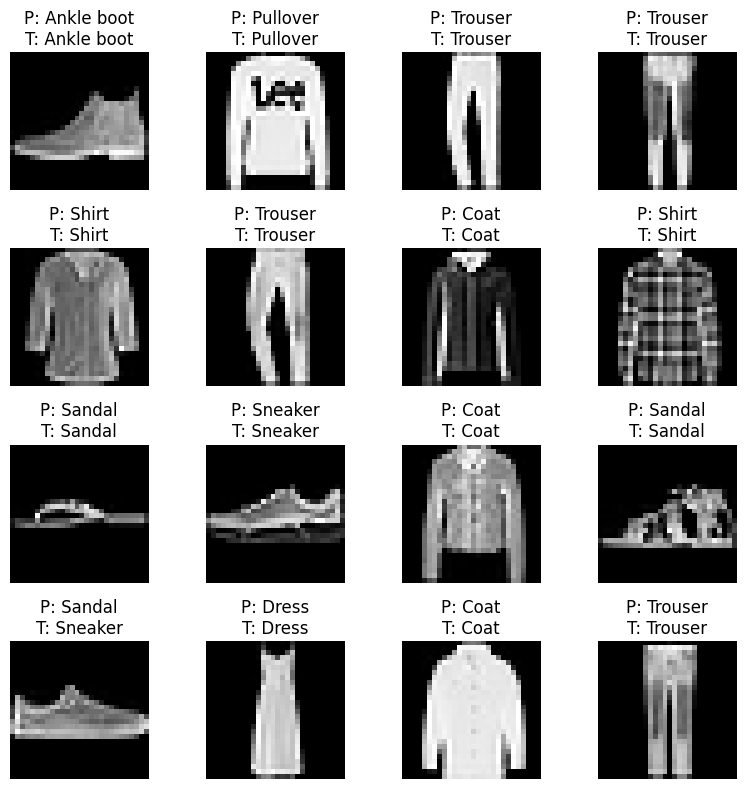

In [18]:
# Show predictions 
@torch.no_grad()
def show_predictions(images, labels, model, n=16):
    preds = model(images).argmax(dim=1)

    # Plot images with predictions
    plt.figure(figsize=(8, 8))
    for i in range(n):
        plt.subplot(4, 4, i + 1)
        img = images[i].cpu().squeeze(0)
        plt.imshow((img * 0.5 + 0.5), cmap="gray")
        plt.title(f"P: {CLASSES[preds[i]]}\nT: {CLASSES[labels[i]]}")
        plt.axis("off")

    # Display the plot
    plt.tight_layout()
    plt.show()

show_predictions(images, labels, model)


## Quick Accuracy Sanity Check (Single Batch)

This is **not** a full evaluation —  
only a quick sanity check on one batch.


In [19]:
# Compute batch accuracy
@torch.no_grad()
def batch_accuracy(images, labels, model):
    preds = model(images).argmax(dim=1)
    return (preds == labels).float().mean().item()

# Calculate and print accuracy
acc = batch_accuracy(images, labels, model)
print(f"Batch accuracy: {acc:.4f}")


Batch accuracy: 0.8750


## Inference Time Measurement

We measure how fast the model performs inference  
on a single batch (CPU).


In [20]:
import time

# Measure inference time
@torch.no_grad()
def measure_inference_time(model, images):
    _ = model(images)  # warmup
    t0 = time.perf_counter()
    _ = model(images)
    t1 = time.perf_counter()
    return (t1 - t0) * 1000  # ms

# Measure and print inference time
ms = measure_inference_time(model, images)
print(f"Inference time: {ms:.2f} ms for batch of {images.size(0)} samples")
print(f"Per-sample: {ms / images.size(0):.4f} ms")


Inference time: 0.48 ms for batch of 64 samples
Per-sample: 0.0076 ms


## Key Takeaways

- MLP achieves ~89% accuracy on Fashion-MNIST
- Training pipeline with early stopping behaves stably
- Model inference is extremely fast on CPU
- Clear separation between:
  - **Training scripts**
  - **Inference & demo notebook**

This notebook is intentionally **read-only** with respect to training.
